# Table of Contents

* [Introduction](#Intro)
* [Importing Modules](#Importing)
* [Load Data](#Load)
* [Explain Data](#Explain)
* [Explore Data](#Explore)
    * [Checking data](#Explore_1)
    * [Continuous variable](#Explore_2)
    * [Categorical variable ](#Explore_3)
* [Machine Learning Preparation](#Machineprep)
    * [Formulate a Question](#Machineprep_1)
    * [Preprocessing](#Machineprep_2)
    * [Droping Null Values](#Machineprep_3)
    * [Splitting Data](#Machineprep_4)
* [Machine Learning Model](#Machinel)
    * [Classification](#Machinel_1)
        * [K Neighbors](#Machinel_1_a)
        * [Decision Tree](#Machine_1_b)
        * [Random Forest](#Machine_1_c)
    * [Regression](#Machine_2)
        * [Linear Regression](#Machinel_2_a)
        * [Logistic Regression](#Machine_2_b)
        * [K-Neighbors Regression](#)
* [Conclusion](#Conclusion)

# 0. Introduction <a class="anchor" id="Intro"></a>

This project analyzes data from online dating app OkCupid. These app give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to try to predict some characteristics of the platform's users.

## 1. Importing Modules <a class="anchor" id="Importing"></a>

In [1]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
#Loading up the DataFrame and inspecting contents

profiles = pd.read_csv('profiles.csv')

0.11.0


## 2. Load Data <a class="anchor" id="Load"></a>

In [2]:
profiles.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


To facilitate our work, let's split our dataset

In [3]:
profiles.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

## 3. Explain Data <a class="anchor" id="Explain"></a>

About the data

**Continuous variable**
* `'age'` - age of user
* `'height'` - height of user
* `'income'` -income of user

**Categorical variable**

* `'body_type'` - body type of user
* `'diet'` - dietary information
* `'drinks'` - alcohol consumption
* `'drugs'` - drug usage
* `'education'` - educational attainment
* `'ethnicity'` - ethnic backgrounds
* `'job'` - employment description
* `'location'` - user locations
* `'offspring'` - children status
* `'orientation'` - sexual orientation
* `'pets'` - pet preferences
* `'religion'` - religious background
* `'sex'` - gender
* `'sign'` - astrological symbol
* `'smokes'` - smoking consumption
* `'speaks'` - language spoken
* `'status'` - relationship status

**Date variable**

* `'last_online'` - last login


**Short answer**
* `'essay0'`- My self summary
* `'essay1'`- What I’m doing with my life
* `'essay2'`- I’m really good at
* `'essay3'`- The first thing people usually notice about me
* `'essay4'`- Favorite books, movies, show, music, and food
* `'essay5'`- The six things I could never do without
* `'essay6'`- I spend a lot of time thinking about
* `'essay7'`- On a typical Friday night I am
* `'essay8'`- The most private thing I am willing to admit
* `'essay9'`- You should message me if…

## 4. Explore Data <a class="anchor" id="Explore"></a>

### 4.1 Checking data <a class="anchor" id="Explore_1"></a>

In [4]:
print(profiles.shape)
profiles.describe()

(59946, 31)


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


We will deal with null values later.

In [5]:
# Null values
profiles.isnull().sum().sort_values(ascending=False)

offspring      35561
diet           24395
religion       20226
pets           19921
essay8         19225
drugs          14080
essay6         13771
essay9         12603
essay7         12451
essay3         11476
sign           11056
essay5         10850
essay4         10537
essay2          9638
job             8198
essay1          7572
education       6628
ethnicity       5680
smokes          5512
essay0          5488
body_type       5296
drinks          2985
speaks            50
height             3
status             0
income             0
last_online        0
location           0
orientation        0
sex                0
age                0
dtype: int64

The 'unknown' status we will treat as Null Values, but let's leave for another occasion.

In [6]:
profiles.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

### 4.2 Continuous variable <a class="anchor" id="Explore_2"></a>

Most users are 30th and It seems that there are proportionally similar break down of gender by age, but slightly fewer females overall.

In [7]:
# age histogram
counting = list(range(0, 90, 10))
g = sns.(data=profiles, x = 'age', hue='sex', binwidth  = 2, multiple="stack", palette='Set2')
g.set(xlim=(0,80), xticks= counting)
plt.title('Age by gender', fontsize=14)
plt.show()
g.savefig('age_hist.png')

SyntaxError: invalid syntax (<ipython-input-7-019fdd2b8740>, line 3)

Proportionally, females tend to be smaller than men.

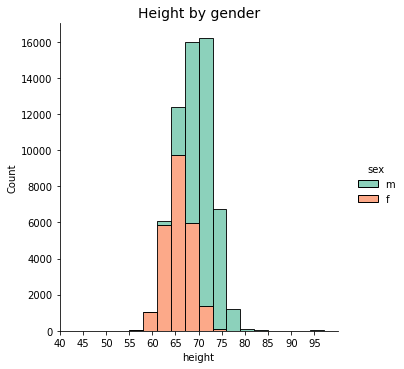

In [40]:
# height histogram

g = sns.displot(data=profiles, x='height', hue='sex', binwidth = 3, multiple = 'stack', palette='Set2')
g.set(xlim = (40, 100), xticks = list(range(40, 100, 5)))
plt.title('Height by gender', fontsize=14)
plt.show()
g.savefig('height_hist.png')

It seems that the majority of the participants do not include their income figures.

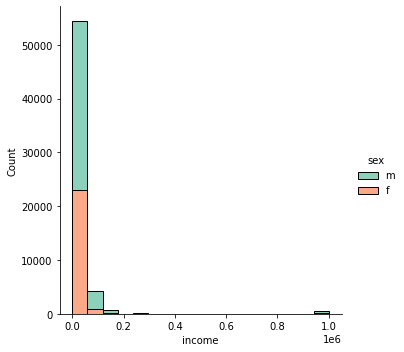

In [9]:
# income histogram
g= sns.displot(x='income', data = profiles, hue='sex', multiple = 'stack', kind='hist', palette='Set2')
plt.show()

### 4.3 Categorical variable <a class="anchor" id="Explore_3"></a>

The dataset has 60% of male user, followed by 40% of female.

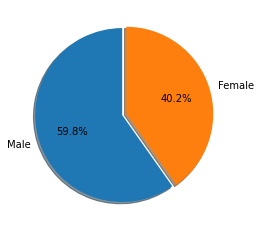

<Figure size 432x288 with 0 Axes>

In [10]:
explode = ([0, 0.05])

plt.pie(profiles.sex.value_counts(), labels=['Male', 'Female'] ,autopct='%.1f%%', explode = explode, shadow=True, startangle=90)
plt.show()

Most user consider themselves as straight orientation.

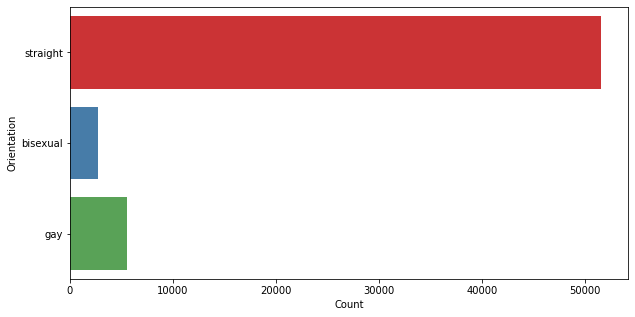

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=profiles, y='orientation', palette='Set1')
plt.ylabel('Orientation')
plt.xlabel('Count')
plt.show()

The Dataset shows that most people have an affinity with agnosticism.

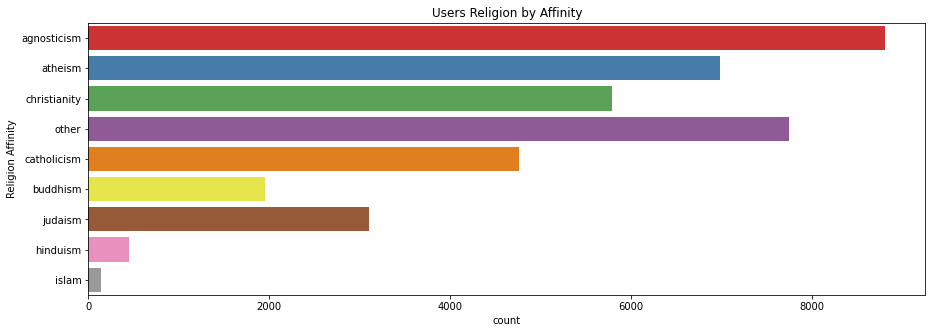

In [12]:
profiles['religion_afinity'] = profiles.religion.str.split().str.get(0)
plt.figure(figsize=(15,5))
sns.countplot(data=profiles, y='religion_afinity', palette="Set1")
plt.title('Users Religion by Affinity')
plt.ylabel('Religion Affinity')
plt.show()

In [13]:
def c_plot(col):
    name = profiles[col]
    fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
    axes[0] = sns.countplot(ax=axes[0], y=name, data=profiles, palette='Set1')
    axes[0].set_title(f'{col} total')
    axes[1] = sns.countplot(ax=axes[1], y=name, data=profiles, hue='sex', palette='Set2')
    axes[1].set_title(f'{col} by sex')
    plt.tight_layout()
    return fig

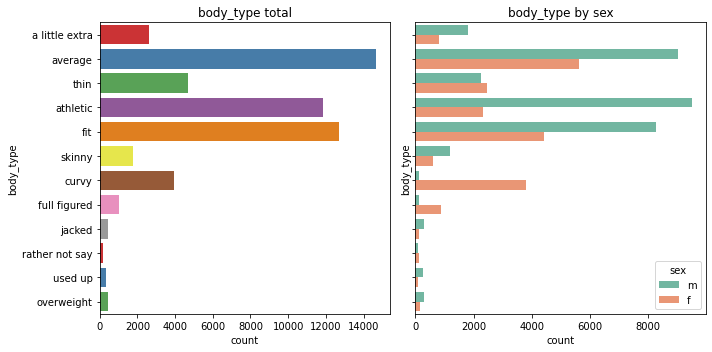

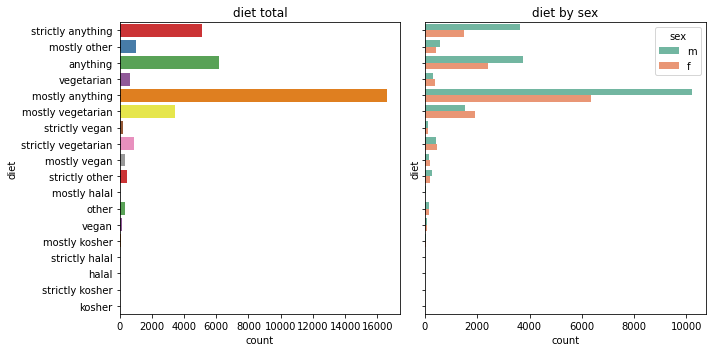

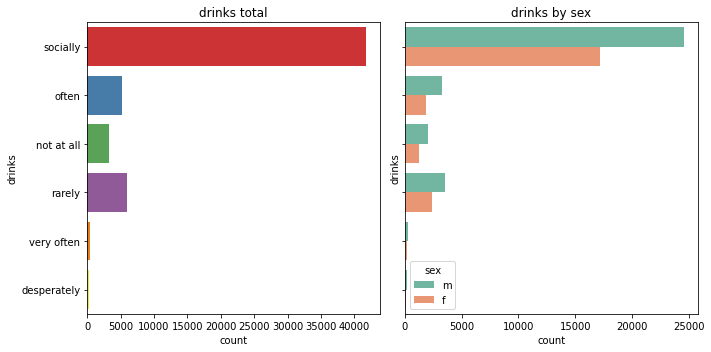

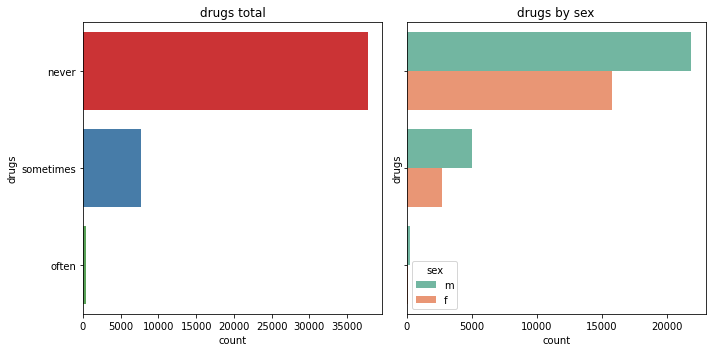

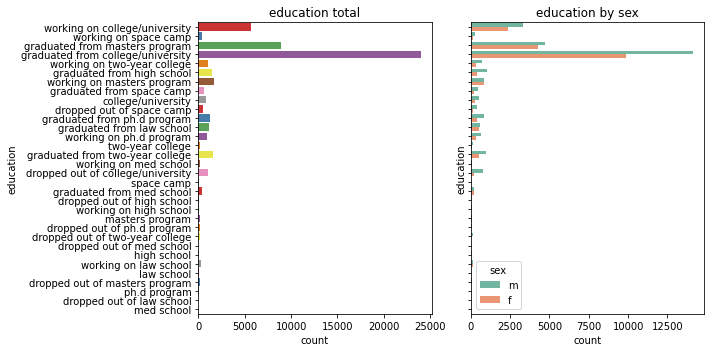

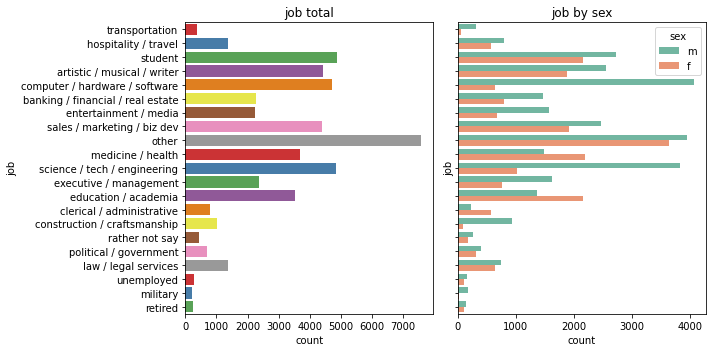

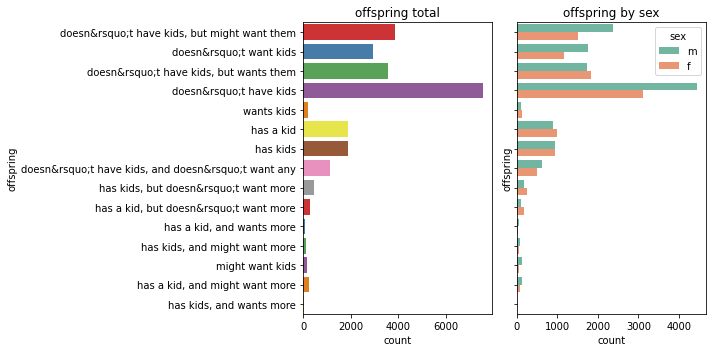

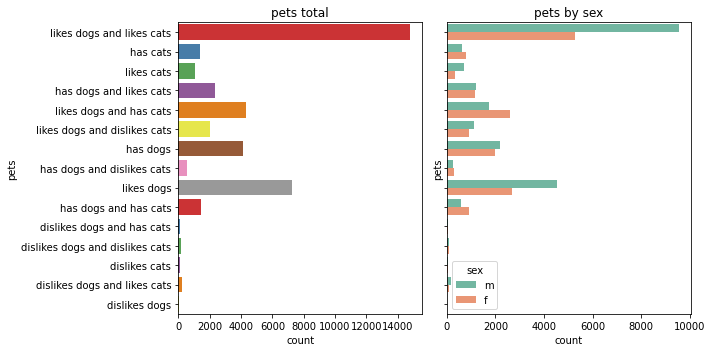

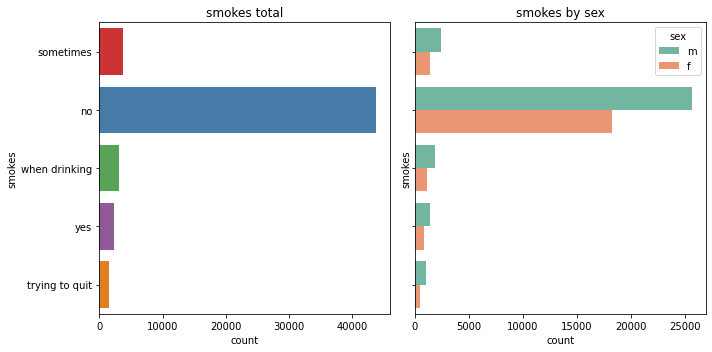

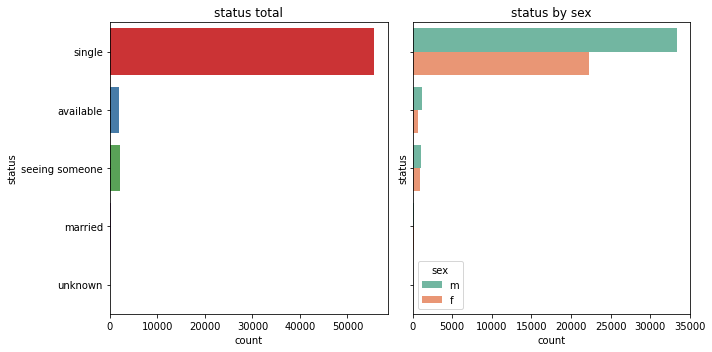

In [14]:
df_columns = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job',
              'offspring', 'pets', 
              'smokes', 'status']
for col in df_columns:
    c_plot(col)
    plt.savefig(f'fig{col}.png')

* About `body_type`: Most of the users classify themselves as Average, men majority classify themselves as athletic, women as average. 
* About `diet`: Most of the users classify themselves as mostly anything.
* About `drinks`: Most of the users drinks socialy.
* About `drugs`: Most of the users never used drugs.
* About `education`: Most users are graduated from college/university.
* About `job`: Most of men work as computer/hardware/software, women with non-list jobs (others).
* About `offspring`: Most of user does not have kids.
* About `pets`: Most of user like dogs and cats.
* About `smoke`: Most of user don't smoke.
* About `status`: Most of user are single.

## 5. Machine Learning Preparation <a class="anchor" id="Machineprep"></a>

### 5.1 Formulate a Question <a class="anchor" id="Machineprep_1"></a>
#### 5.1.1 Classification Question: Can we predict *status*  based on the following features:
*   Physical characteristics: `body_type`;
*  Habits:  `diet`, `drinks`, `drugs` and `smoke`;

#### 5.1.2 Regression Question: Can we predict *height* based on the following features:

* user `age`;
* `status` relationship;

### 5.2 Preprocessing <a class="anchor" id="Machineprep_2"></a>

In [15]:
# Selecting columns
cols = ['body_type', 'diet', 'drinks', 'drugs', 'smokes', 'status', 'height', 'age']
df = profiles[cols]
df.head()

,body_type,diet,drinks,drugs,smokes,status,height,age
0,a little extra,strictly anything,socially,never,sometimes,single,75.0,22
1,average,mostly other,often,sometimes,no,single,70.0,35
2,thin,anything,socially,NaN,no,available,68.0,38
3,thin,vegetarian,socially,NaN,no,single,71.0,23
4,athletic,NaN,socially,never,no,single,66.0,29


Mapping variables will turn the categories per variable into it's own binary identifier.

In [16]:
# Body Type mappinh
body_type_map = {
'average' : 0,
'fit' : 1,
'athletic' : 2,
'thin' : 3,
'curvy' : 4,
'a little extra' : 5,
'skinny' : 6,
'full figured' : 7,
'overweight' : 8,
'used up' : 9,
'jacked' : 10,
'rather not say' : np.nan,
}

# Diet mapping
diet_mapping = {"mostly anything": 0,
                "anything": 0,
                "strictly anything": 0,
                "mostly vegetarian": 1,
                "mostly other": 5,
                "strictly vegetarian": 1,
                "vegetarian": 1,
                "strictly other": 5,
                "mostly vegan": 2,
                "other": 5,
                "strictly vegan": 2,
                "vegan": 2,
                "mostly kosher": 3,
                "mostly halal": 4,
                "strictly kosher": 3,
                "strictly halal": 4,
                "kosher": 3,
                "halal": 4}

# Drink mapping
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}

# Smoke mapping
smokes_mapping = {"no": 0, "trying to quit": 1, "when drinking": 2, "sometimes": 3, "yes": 4}

# Drugs mapping
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}

# Status mapping
status_mapping = {'single' : 0, 'available' : 0, 'seeing someone' : 1, 'married': 0, 'unknown' : np.nan}


df["body_code"] = df.body_type.map(body_type_map)
df["drinks_code"] = df.drinks.map(drink_mapping)
df["smokes_code"] = df.smokes.map(smokes_mapping)
df["drugs_code"] = df.drugs.map(drugs_mapping)
df["diet_code"] = df.diet.map(diet_mapping)
df['status_code'] = df.status.map(status_mapping)

### 5.3 Droping Null Values <a class="anchor" id="Machineprep_3"></a>

* The `status` with unknown might be OkCupid's way of showing Null Values, let's fix this and prepare data for our Machine Learning Models. 

In [17]:
# Drop values for classifier
df = df.dropna()

df.head()

,body_type,diet,drinks,drugs,smokes,status,height,age,body_code,drinks_code,smokes_code,drugs_code,diet_code,status_code
0,a little extra,strictly anything,socially,never,sometimes,single,75.0,22,5.0,2.0,3.0,0.0,0.0,0.0
1,average,mostly other,often,sometimes,no,single,70.0,35,0.0,3.0,0.0,1.0,5.0,0.0
7,average,mostly anything,socially,never,no,single,65.0,31,0.0,2.0,0.0,0.0,0.0,0.0
9,athletic,mostly anything,not at all,never,no,single,65.0,37,2.0,0.0,0.0,0.0,0.0,0.0
11,average,mostly anything,socially,never,no,seeing someone,72.0,28,0.0,2.0,0.0,0.0,0.0,1.0


In [18]:
print(df.shape)
print(df.isnull().sum())

(25121, 14)
body_type      0
diet           0
drinks         0
drugs          0
smokes         0
status         0
height         0
age            0
body_code      0
drinks_code    0
smokes_code    0
drugs_code     0
diet_code      0
status_code    0
dtype: int64


### 5.4 Splitting Data <a class="anchor" id="Machineprep_4"></a>

In [19]:
# Targeting variable y and the rest X
y = df['status_code']
X = df[['body_code', 'drinks_code',	'smokes_code',	'drugs_code', 'diet_code']]

y2 = df[['height']]
x2 = df[['age', 'status_code']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 41)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, test_size=0.2, random_state=41)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('---' * 10)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(20096, 5)
(5025, 5)
(20096,)
(5025,)
------------------------------
(20096, 2)
(5025, 2)
(20096, 1)
(5025, 1)


## 6. Machine Learning Model <a class="anchor" id="Machinel"></a>

### 6.1 Classification <a class="anchor" id="Machinel_1"></a>

Classification Question: Can we predict *status* relationship?

#### 6.1.a K-Neighbors Classifier <a class="anchor" id="Machinel_1_a"></a>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

KNclassifier = KNeighborsClassifier(n_neighbors=10)
KNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

0.9723383084577114


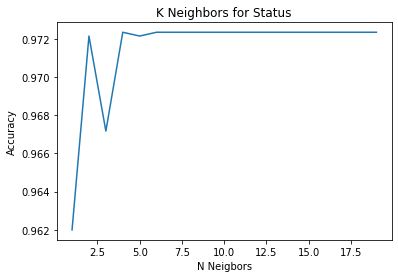

<Figure size 432x288 with 0 Axes>

In [42]:
print(KNclassifier.score(X_test, y_test))

acuracies = []
for k in range(1, 20):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    acuracies.append(classifier.score(X_test, y_test))

plt.plot(range(1, 20), acuracies)
plt.xlabel('N Neigbors')
plt.ylabel('Accuracy')
plt.title('K Neighbors for Status')
plt.show()
plt.savefig('KNeighborsclassifier.png')

#### 6.1.b Decision Tree <a class="anchor" id="Machinel_1_b"></a>

0.9695522388059702


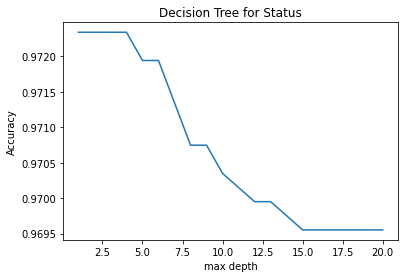

<Figure size 432x288 with 0 Axes>

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Using Decision Tree 
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
score = tree.score(X_test, y_test)
print(tree.score(X_test, y_test))

# Score the best max depth
scores = []
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores.append(tree.score(X_test, y_test))

# Plotting max depth
plt.plot(range(1,21), scores)
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree for Status')
plt.show()
plt.savefig('DecisionTree.png')


#### 6.1.c Random Forest <a class="anchor" id="Machinel_1_c"></a>

0.9709452736318408


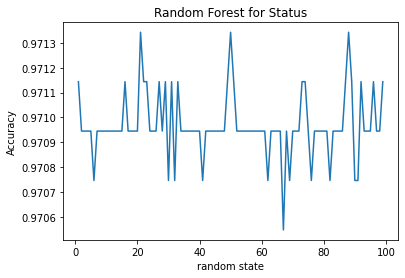

<Figure size 432x288 with 0 Axes>

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Using Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

# Scoring the random state
scores_rf = []
for i in range(1,100):
    forest = RandomForestClassifier(random_state=i)
    forest.fit(X_train, y_train)
    scores_rf.append(forest.score(X_test, y_test))

# Plotting random state
plt.plot(range(1,100), scores_rf)
plt.xlabel('random state')
plt.ylabel('Accuracy')
plt.title('Random Forest for Status')
plt.show()
plt.savefig('RandomFlorest.png')

### 6.2 Regression <a class="anchor" id="Machinel_2"></a>

Regression Question: Can we predict *height*?

#### 6.2.a Linear Regression <a class="anchor" id="Machinel_2_a"></a>

Data score: 0.002605510018017121
Test score: 0.0028602832815965984


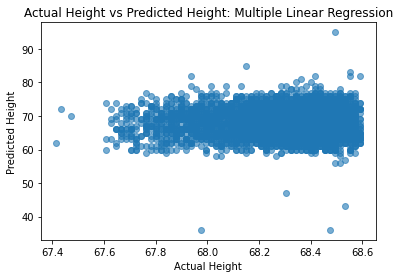

<Figure size 432x288 with 0 Axes>

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

mlr = LinearRegression()

#Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()

X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

mlr.fit(X2_train, y2_train)

y_LR_predict = mlr.predict(X2_test)

print(f'Data score: {mlr.score(X2_train, y2_train)}')
print(f'Test score: {mlr.score(X2_test, y2_test)}')

plt.scatter(y_LR_predict, y2_test, alpha=0.6)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual Height vs Predicted Height: Multiple Linear Regression')
plt.show()
plt.savefig('LinearRegression.png')

### 6.2.b Logistic Regression <a class="anchor" id="Machinel_2_b+"></a>

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X2_train, y2_train)

LogisticRegression()

In [26]:
y_lor_predict = model.predict(X2_test)
model.predict(X2_train) 

array([70., 70., 67., ..., 70., 70., 70.])

0.10171178343949044
0.09751243781094528


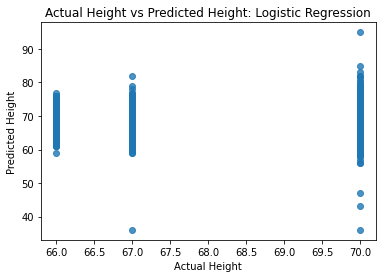

<Figure size 432x288 with 0 Axes>

In [46]:
print(model.score(X2_train, y2_train))
print(model.score(X2_test, y2_test))

plt.scatter(y_lor_predict, y2_test, alpha=0.8)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual Height vs Predicted Height: Logistic Regression')
plt.show()
plt.savefig('LogisticRegression.png')

### 6.2.c K-Neighbors Regression <a class="anchor" id="Machinel_2_c+"></a>

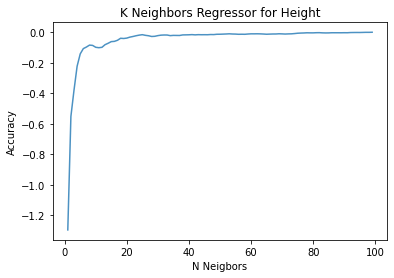

<Figure size 432x288 with 0 Axes>

In [47]:
from sklearn.neighbors import KNeighborsRegressor

KNregressor_score = []
for i in range(1, 100):
    kn_regressor = KNeighborsRegressor(n_neighbors = i, weights='distance')
    kn_regressor.fit(X2_train, y2_train)
    KNregressor_score.append(kn_regressor.score(X2_test, y2_test))

plt.plot(range(1,100), KNregressor_score, alpha=0.8)
plt.xlabel('N Neigbors')
plt.ylabel('Accuracy')
plt.title('K Neighbors Regressor for Height')
plt.show()
plt.savefig('KneighborsRegressor.png')

## 7. Conclusion <a class="anchor" id="Conclusion"></a>

In this project Machine Learning was used to predict the Status Relationship and Heights of OkCupid users, setting two different types of Supervised Machine Learning model, like Regression and Classification. This is an important feature since many companies profit a lot from Valentine dayes. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

* The regression model for predicting `height` were mostly unsucessful in showing any strong correlation.
* Classification model for predicting `status` showed a  high accuracy, highlighted by K-Neighbors Classifier.